In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi

# Unitary rational interpolation at Chebyshev nodes

[0.84894681+1.55300303e+00j 1.1920076 +7.74637923e-01j 0.84894681-1.55300303e+00j 1.28474945+6.15860494e-14j 1.1920076 -7.74637923e-01j]


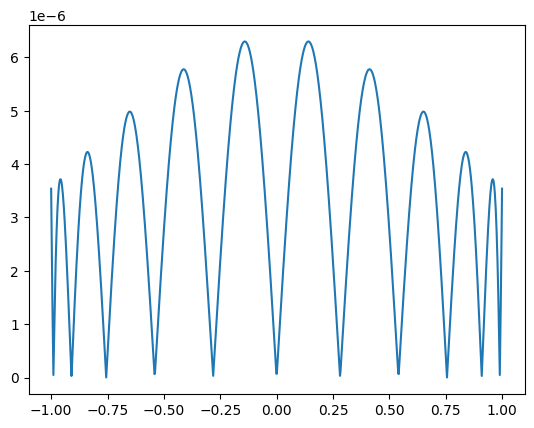

In [2]:
np.set_printoptions(linewidth=180)
n = 5
w = 5
N=1000
xs = np.linspace(-1,1,N)
tol=1e-5
r = rexpi.riCheb(w,n)
yref = np.exp(1j*w*xs)
plt.plot(xs,np.abs(r(1j*xs)-yref));
xnodesref = np.linspace(0,1.05,n+2)
print(r.getpoles())

# Use Linearized Lawson
from AAA-Lawson with support nodes preassigned as $\mathrm{i} \tau_j$ where $\tau_j$ correspond to Chebyshev nodes 

In [3]:
n=12
tol = 1e-6
w = rexpi.buerrest_getw(n,tol)

In [4]:
rx, brnodes, allerr = rexpi.brib(w = w, n = n, npi=50, maxiter = 500, tolequi = 1e-12, step_factor=0.02)
errsbrib = list(zip(*allerr))[0]
devsbrib = list(zip(*allerr))[1]
iterbrib = len(errsbrib)
inodes = brnodes[1]
print(allerr[-1])

(9.114563280412561e-07, 2.8953024533429073e-08, 5.698233702098045e-10)


In [5]:
supportnodes = inodes[::2]
rl, errvec = rexpi.linearizedLawson(w = w, n = n, y=supportnodes, nlawson=100,nx=3000,idl=1)
N=5000 # larger number of points for plots to resolve error at peaks
xs = np.linspace(-1,1,N)
yref = np.exp(1j*w*xs)
aprxerr = rl(1j*xs)-yref
aprxerrxmax = np.max(np.abs(aprxerr))
#print([errvec[-1],devvec[-1]])
print([errvec[-1]])

[9.1184532129331e-07]


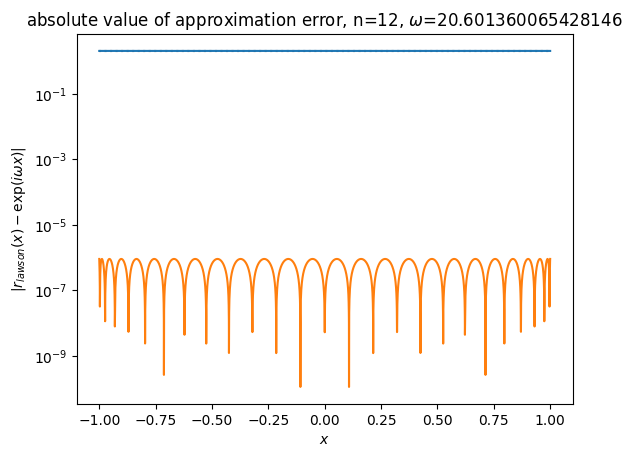

In [6]:
plt.semilogy([-1,1],[aprxerrxmax,aprxerrxmax],'k:')
plt.semilogy(xs,np.abs(aprxerr));
plt.title("absolute value of approximation error, n={}, $\omega$={}".format(n,w))
plt.ylabel("$|r_{lawson}(x)-\exp( i \omega x)|$")
plt.xlabel("$x$");
plt.semilogy(xs,np.abs(rx(1j*xs)-yref));
#plt.ylim([aprxerrxmax*0.9,aprxerrxmax*1.01]);
#print(np.max(np.abs(np.abs(rl(1j*xs))-1)))

In [7]:
#plt.semilogy(np.arange(len(devvec)),devvec,np.arange(iterbrib),devsbrib);
xs = np.arange(-1,1,6000)
errcheck=np.max(np.abs(rl(xs)-rx(xs)))
print(errcheck)

0.00088382006738083


(6e-07, 3e-06)

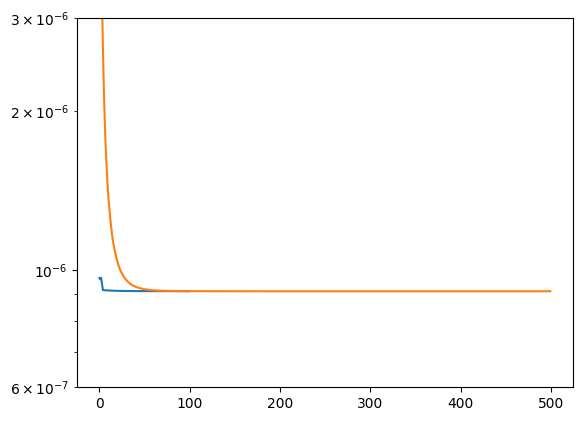

In [8]:
#plt.semilogy(np.arange(len(errvec)),np.array(errvec)*np.array(devvec),np.arange(iterbrib),np.array(errsbrib)*np.array(devsbrib))
plt.semilogy(np.arange(len(errvec)),errvec,np.arange(iterbrib),errsbrib)
plt.ylim(6e-7,3e-6)